# Phoneme Data Analysis

This notebook will analyze and preprocess the phoneme data. The dataset was used in the European ESPRIT 5516 project (ROARS), in which the objective is to  develove and inmplementing a real time analytical system of speech recognition for the French and Spanish languages.

As said by the words of [Phoneme Data Description](https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names):
    
    The aim of the present database is to distinguish between nasal and
    oral vowels. There are thus two different classes:

        Class 0 : Nasals
        Class 1 : Orals

    This database contains vowels coming from 1809 isolated syllables (for
    example: pa, ta, pan,...).  Five different attributes were chosen to
    characterize each vowel: they are the amplitudes of the five first
    harmonics AHi, normalised by the total energy Ene (integrated on all 
    the frequencies): AHi/Ene. Each harmonic is signed: positive when it
    corresponds to a local maximum of the spectrum and negative otherwise.

## Dependencies

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [3]:
phoneme = pd.read_csv("phoneme.csv")
phoneme.head(10)

,1.24,0.875,-0.205,-0.078,0.067,0
0,0.268,1.352,1.035,-0.332,0.217,0
1,1.567,0.867,1.300,1.041,0.559,0
2,0.279,0.990,2.555,-0.738,0.000,0
3,0.307,1.272,2.656,-0.946,-0.467,0
4,0.960,0.712,-0.143,0.091,-0.061,0
5,2.941,0.657,1.493,-0.331,-0.123,0
6,0.401,1.159,2.064,-0.690,-0.308,0
7,0.229,1.748,0.634,0.259,0.000,0
8,0.303,0.609,0.474,1.427,-0.811,1
9,0.318,0.811,0.818,0.821,0.860,1


The dataset has no feature names, neither the class column, so we will give their names based upon the [Phoneme Data Description](https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names)

In [52]:
# Get the columns names as array
new_header = phoneme.columns.values
new_header

array(['1.24', '0.875', '-0.205', '-0.078', '0.067', '0'], dtype=object)

In [54]:
# Create a DataFrame from the hedader
ph = pd.DataFrame(new_header.astype(float)[None,:],columns=list(new_header))
# Transform the type of classes as integer
ph['0'] = ph['0'].astype('int64')
# Append both the dataframes
ph = ph.append(phoneme)
# Rename the columns
cols = {new_header[i]:'H{}'.format(i+1) for i in range(new_header.size-1)}
cols['0']='target'
ph=ph.rename(columns=cols)


ph.head(10)

,H1,H2,H3,H4,H5,target
0,1.240,0.875,-0.205,-0.078,0.067,0
0,0.268,1.352,1.035,-0.332,0.217,0
1,1.567,0.867,1.300,1.041,0.559,0
2,0.279,0.990,2.555,-0.738,0.000,0
3,0.307,1.272,2.656,-0.946,-0.467,0
4,0.960,0.712,-0.143,0.091,-0.061,0
5,2.941,0.657,1.493,-0.331,-0.123,0
6,0.401,1.159,2.064,-0.690,-0.308,0
7,0.229,1.748,0.634,0.259,0.000,0
8,0.303,0.609,0.474,1.427,-0.811,1


## Dataset Information and Description

Let's analyze the information and the data description.

In [55]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5404 entries, 0 to 5402
Data columns (total 6 columns):
H1        5404 non-null float64
H2        5404 non-null float64
H3        5404 non-null float64
H4        5404 non-null float64
H5        5404 non-null float64
target    5404 non-null int64
dtypes: float64(5), int64(1)
memory usage: 295.5 KB


So we can see that there are no missing data, which is a good thing, and all the features are floats, so for while we do not need to change any data type as much as the **target** feature, which is already of integer type.

Now, let's see the description.

In [56]:
ph.describe()

,H1,H2,H3,H4,H5,target
count,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000,5404.000000
mean,0.818957,1.258802,0.764732,0.398743,0.078619,0.293486
std,0.858733,0.851057,0.925436,0.796531,0.575624,0.455401
min,-1.700000,-1.327000,-1.823000,-1.581000,-1.284000,0.000000
25%,0.243750,0.596000,-0.115000,-0.205000,-0.232250,0.000000
50%,0.492500,1.075500,0.729000,0.285500,-0.044000,0.000000
75%,1.089250,1.866250,1.484000,0.937000,0.196250,1.000000
max,4.107000,4.378000,3.199000,2.826000,2.719000,1.000000


The means and the stds shows that the data hasn't so much variation, which is not necessary to standarlize the data. 

Now I will analyze the counting of labeled data, to see if there is some tendency.

In [66]:
count = ph['target'].value_counts().rename_axis('Unique').to_frame('Counts')

In [67]:
count['Counts']

Unique
0    3818
1    1586
Name: Counts, dtype: int64

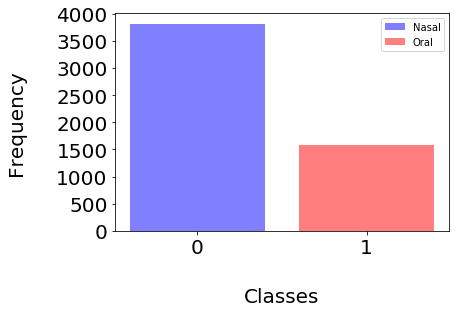

Nasal Vowels: 70.65%
Oral Vowels: 29.35%
Ratio Nasal/Oral: 240.73%


In [82]:
plt.bar(np.arange(1),count['Counts'][0],color='b',alpha=0.5, label='Nasal')
plt.bar(np.arange(1)+1,count['Counts'][1],color='r',alpha=0.5, label='Oral')
plt.xlabel('Classes',fontsize=20, labelpad=30)
plt.ylabel('Frequency',fontsize=20, labelpad=30)
plt.xticks(np.arange(2),['0','1'],fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()
print("Nasal Vowels: {}%".format(round(3818*100/count['Counts'].sum(),2)))
print("Oral Vowels: {}%".format(round(1586*100/count['Counts'].sum(),2)))
print("Ratio Nasal/Oral: {}%".format(round((3818/1586)*100,2)))

So we can see that there are 70% of the data labeled as Nasal, and it's 240% higher than the oral vowels. It's clear that the Nasal label is biased.

Now, let's save our dataset.

In [83]:
ph.to_csv("phoneme.data")